# HW 2 - Simple Neural Networks

Part 1: In this first real coding assignment, you will initially explore the operation of a single perceptron (more for historical value than for modern usefulness) and a single Sigmoid neuron to implement the "real world" example of going to a cheese festival.

Part 2: In the second part, you will switch over to using the author's code to complete a full neural network that can recognize handwritten digits. You will train and run the network monitoring both how long it takes to train AND the test accuracy once training is complete.

Part 3: In the third part, you will experiment with hyper-parameters such as the number of epochs, the batch size, and the learning rate. Again, you will monitor the training time and the test accuracy after training is complete.

Part 4: In the final part, you will experiment with the network structure itself by changing the number of neurons in the hidden layer. You will again report the training time and test accuracy, but this time you will also report the evaluation time.


In [1]:
from abc import abstractmethod
class Neuron:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  @abstractmethod
  def output(self, x):
    pass

In [2]:
import math

class Perceptron(Neuron):
  def __init__(self, w, b):
    super().__init__(w, b)

  """
    x: list of inputs ... must be same length as w
    return 0 or 1 based on classic perceptron calculation weighted sum of inputs plus bias must be strictly greater than 0 to produce a 1 otherwise return a 0
  """
  def output(self, x):
    z = 0
    for i in range(len(self.w)):
      z = z + self.w[i]*x[i]
    z = z + self.b
    return 0 if z <= 0 else 1

class SigmoidNeuron(Neuron):
  def __init__(self, w, b):
    super().__init__(w, b)

  """
    x: list of inputs ... must be same length as w
    return 0 or 1 based on classic perceptron calculation weighted sum of inputs plus bias must be strictly greater than 0 to produce a 1 otherwise return a 0
  """
  def output(self, x):
    z = 0
    for i in range(len(self.w)):
      z = z + self.w[i]*x[i]
    z = z + self.b
    return 1/(1+math.exp(-z))


In [3]:
# PART 1a - instantiate a single Perceptron with the weights described in Chapter 1 for going to the festival. Then print out the output of calling the "output" function on that neuron with three combinations of inputs for the weather, girlfiend, and public transit inputs.
p = Perceptron([6,2,2], -5)
x = [1, 1, 1]
a = p.output(x)
print(a)
x = [0,1,1]
a = p.output(x)
print(a)

# PART 2b - repeat Part1a, but this time use a SigmoidNueron instead. Compare the output with Part 1a and explain in a comment how this part using a SigmoidNeuron could still give you the "right" answer about whether to go or not.
s = SigmoidNeuron([6,2,2], -5)
x = [1, 1, 1]
a = s.output(x)
print(a)
x = [0,1,1]
a = s.output(x)
print(a)

1
0
0.9933071490757153
0.2689414213699951


In [5]:
# PART 2 - run the code below to download your author's code and then train and evaluate the network. ****Make note of the total training time and test accuracy****
#%cd /content 
%cd "/workspaces/cosc470/" 
!pwd
!git clone "https://github.com/MichalDanielDobrzanski/DeepLearningPython" nn





/workspaces/cosc470
/workspaces/cosc470
fatal: destination path 'nn' already exists and is not an empty directory.


In [6]:
# load the data into memory (training_data and test_data numpy arrays)
%cd nn
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)
print(len(training_data))
print(len(test_data))
import numpy as np
firstname = np.reshape(training_data[0][0], (28, 28))
print(firstname)


/workspaces/cosc470/nn
50000
10000
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [9]:
# default run with default hyperparameters - 20 epochs, batch size of 10, and learning rate of 3.0

import importlib
import network
importlib.reload(network)
net = network.Network([784, 30, 10])
#print(training_data[800][1])
#print(net.feedforward(training_data[800][0]))
#print(net.biases)
net.SGD(training_data, 20, 10, 4.0, test_data=test_data) #batch size means how many images looked at before changes are made, once all 50,000 images are run through once that is epoch 1

#print(net.feedforward(training_data[800][0])) #print the output of the 800th image in the training set

Epoch 0 : 9166 / 10000
Epoch 1 : 9288 / 10000
Epoch 2 : 9348 / 10000
Epoch 3 : 9377 / 10000
Epoch 4 : 9363 / 10000
Epoch 5 : 9352 / 10000
Epoch 6 : 9396 / 10000
Epoch 7 : 9451 / 10000
Epoch 8 : 9433 / 10000
Epoch 9 : 9461 / 10000
Epoch 10 : 9434 / 10000
Epoch 11 : 9415 / 10000
Epoch 12 : 9437 / 10000
Epoch 13 : 9423 / 10000
Epoch 14 : 9434 / 10000
Epoch 15 : 9458 / 10000
Epoch 16 : 9475 / 10000
Epoch 17 : 9465 / 10000
Epoch 18 : 9439 / 10000
Epoch 19 : 9470 / 10000


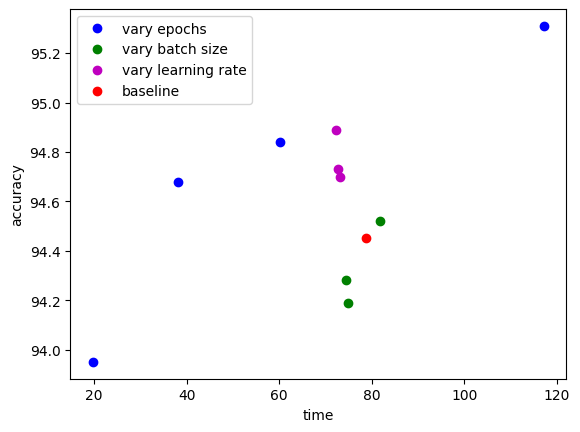

In [ ]:
# PART 3 - experiment with the hyperparameters ... try the following combinations

# three different lists of training times and three different lists on accuracys on matplotlib

tt_baseline = 78.8
acc_baseline = 94.45


# Varying the number of epochs: 5, 10, 15, 30 (see below)
# 5, 10, 3.0 
# 10, 10, 3.0
# 15, 10, 3.0
# 30, 10, 3.0
tt_epochs = [19.7, 38.2, 60.1, 117.1]
acc_epochs = [93.95, 94.68, 94.84, 95.31]

# Varying the batch size: 5, 20, 30
# 20, 5, 3.0
# 20, 20, 3.0
# 20, 30, 3.0
tt_batches = [81.7, 74.5, 74.8]
acc_batches = [94.52, 94.28, 94.19]

# Varying the learning rate: 2.5, 3.5, 4.0
# 20, 10, 2.5
# 20, 10, 3.5
# 20, 10, 4.0
tt_learn = [72.3, 72.7, 73.1]
acc_learn = [94.89, 94.73, 94.70]

tt = tt_epochs + tt_batches + tt_learn
acc = acc_epochs + acc_batches + acc_learn


# After all 10 RUNS plus your original run with the defaults (20, 10, 3.0), plot your timing results and final test accuracy in a single chart using matplotlib
import matplotlib.pyplot as plt
#epochs
plt.plot(tt_epochs,  acc_epochs, 'bo', label='vary epochs')
#batch size
plt.plot(tt_batches, acc_batches, 'go', label='vary batch size')
#learning rate
plt.plot(tt_learn,   acc_learn, 'mo', label='vary learning rate')
#baseline
plt.plot([tt_baseline], [acc_baseline], 'ro', label='baseline')
plt.legend()
#plt.plot([tt_baseline], [acc_baseline], 'ro')
plt.ylabel("accuracy")
plt.xlabel("time")
plt.show()


In [33]:
# PART 4 - experiment with network structure, just try three different configurations
# [784, 10, 10], [784, 50, 10], and [784, 100, 10]

import importlib
import network
importlib.reload(network)
net = network.Network([784, 16, 16, 10])
#print(training_data[800][1])
#print(net.feedforward(training_data[800][0]))
#print(net.biases)
net.SGD(training_data, 20, 10, 3.0, test_data=test_data)

# After these 3 runs, plot your training timing results, test accuracy, AND evaluation timing
# To measure the evaluation time, manually test 100 samples from the test dataset, measure how long that takes and divide by 100 to get a per/image evaluate rate

# Use Matplotlib to plot ALL THREE results (training time, test accuracy, and evaluation rate) on three different axes


Epoch 0 : 8875 / 10000
Epoch 1 : 9199 / 10000
Epoch 2 : 9106 / 10000
Epoch 3 : 9262 / 10000
Epoch 4 : 9247 / 10000
Epoch 5 : 9243 / 10000
Epoch 6 : 9284 / 10000
Epoch 7 : 9280 / 10000
Epoch 8 : 9289 / 10000
Epoch 9 : 9352 / 10000
Epoch 10 : 9324 / 10000
Epoch 11 : 9371 / 10000
Epoch 12 : 9371 / 10000
Epoch 13 : 9345 / 10000
Epoch 14 : 9377 / 10000
Epoch 15 : 9379 / 10000
Epoch 16 : 9375 / 10000
Epoch 17 : 9404 / 10000
Epoch 18 : 9348 / 10000
Epoch 19 : 9404 / 10000


In [34]:
#do your evaluation tests here after each run
for i in range(len(test_data)):
    net.feedforward(test_data[i][0])
for i in range(len(training_data)):
    net.feedforward(training_data[i][0])



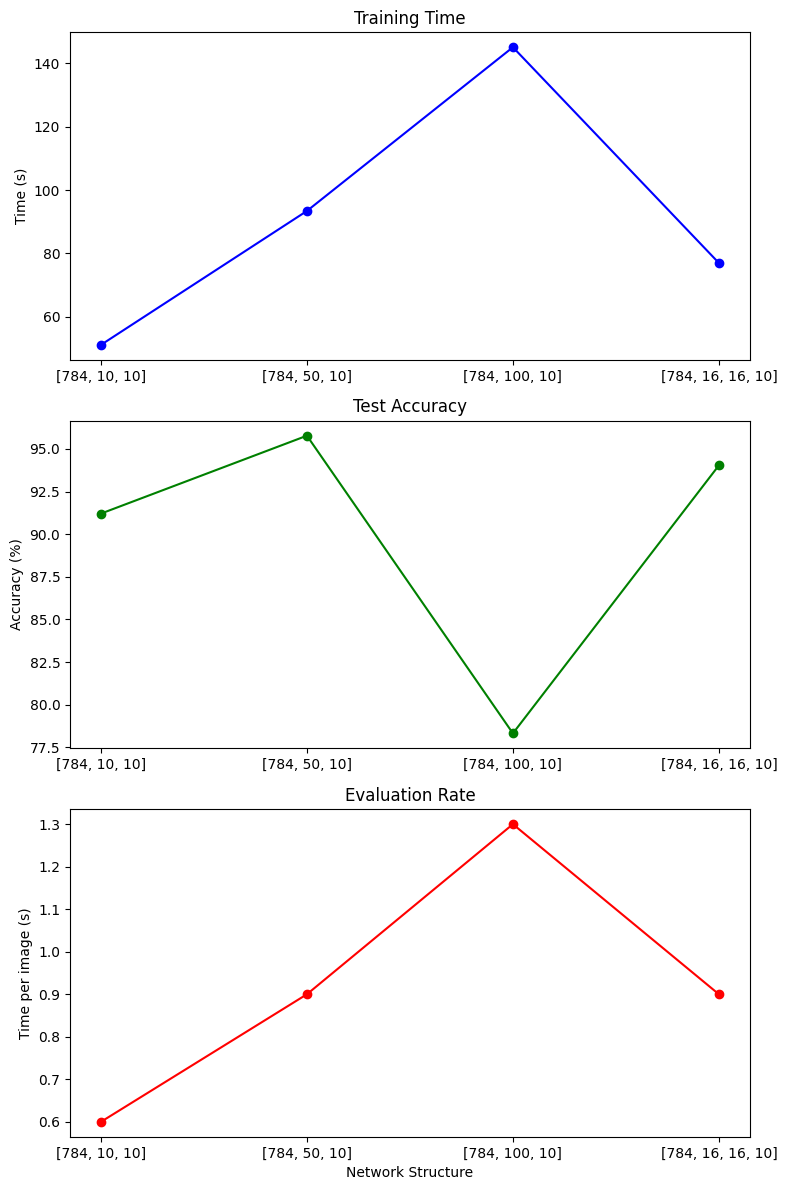

In [ ]:
tt_struct = [51.2, 93.4, 145.0, 77.0]
acc_struct = [91.21, 95.78, 78.32, 94.04]
eval_struct = [0.6, 0.9, 1.3, 0.9]
labels_struct = ["[784, 10, 10]", "[784, 50, 10]", "[784, 100, 10]", "[784, 16, 16, 10]"]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
#training time
axs[0].plot(labels_struct, tt_struct, 'bo-')
axs[0].set_title('Training Time')
axs[0].set_ylabel('Time (s)')
#test accuracy
axs[1].plot(labels_struct, acc_struct, 'go-')
axs[1].set_title('Test Accuracy')
axs[1].set_ylabel('Accuracy (%)')
#evaluation rate
axs[2].plot(labels_struct, eval_struct, 'ro-')
axs[2].set_title('Evaluation Rate')
axs[2].set_ylabel('Time per image (s)')
axs[2].set_xlabel('Network Structure')
plt.tight_layout()
plt.show()
